In [1]:
# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))
# Load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import NearestCentroid

# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = read_csv(url, names=names)

Python: 3.8.3 (default, Jul  2 2020, 11:26:31) 
[Clang 10.0.0 ]
scipy: 1.5.0
numpy: 1.18.5
matplotlib: 3.2.2
pandas: 1.0.5
sklearn: 0.23.1


In [2]:
# shape
print(dataset.shape)

(150, 5)


In [3]:
# head
print(dataset.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [4]:
# class distribution
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


In [5]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:4]
y = array[:,4]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

In [6]:
...
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.941667 (0.065085)
LDA: 0.975000 (0.038188)
KNN: 0.958333 (0.041667)
CART: 0.950000 (0.055277)
NB: 0.950000 (0.055277)
SVM: 0.983333 (0.033333)


In [7]:
# Make predictions on validation dataset knn
model = KNeighborsClassifier()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [8]:
# Evaluate predictions for knn model
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

1.0
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [9]:
# Make predictions on validation dataset decision tree
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [10]:
# Evaluate predictions for knn model
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



[Text(167.4, 199.32, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(141.64615384615385, 163.07999999999998, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 54.359999999999985, 'X[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(154.52307

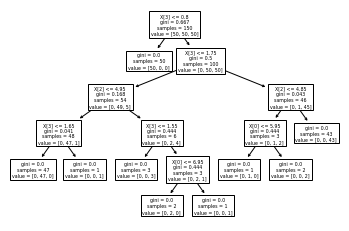

In [11]:
>>> clf = tree.DecisionTreeClassifier()
>>> clf = clf.fit(X, y)
tree.plot_tree(clf) 

In [12]:
print(dataset)

     sepal-length  sepal-width  petal-length  petal-width           class
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


In [13]:
# Get new dataset that will be cleaned
cleaned_dataset = dataset
print(cleaned_dataset)

     sepal-length  sepal-width  petal-length  petal-width           class
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


In [14]:
# Cast every attributes to str

cleaned_dataset=cleaned_dataset.astype('str')

In [15]:
# cleaning functions

def sepal_length_adapter(df,attribute):
    for i in range(len(df)): 
        if float(df[attribute][i])<=5.1 :
            df.at[i,attribute] = "sm_sl"
        elif float(df[attribute][i])<=6.4 :
            df.at[i,attribute] = "m_sl"
        else:
            df.at[i,attribute] = "lg_sl"
            
def sepal_width_adapter(df,attribute):
    for i in range(len(df)): 
        if float(df[attribute][i])<=2.8 :
            df.at[i,attribute] = "sm_sw"
        elif float(df[attribute][i])<=3.3 :
            df.at[i,attribute] = "m_sw"
        else:
            df.at[i,attribute] = "lg_sw"

def petal_length_adapter(df,attribute):
    for i in range(len(df)): 
        if float(df[attribute][i])<=1.6 :
            df.at[i,attribute] = "sm_pl"
        elif float(df[attribute][i])<=5.1 :
            df.at[i,attribute] = "m_pl"
        else:
            df.at[i,attribute] = "lg_pl"
            
def petal_width_adapter(df,attribute):
    for i in range(len(df)): 
        if float(df[attribute][i])<=0.3 :
            df.at[i,attribute] = "sm_pw"
        elif float(df[attribute][i])<=1.8 :
            df.at[i,attribute] = "m_pw"
        else:
            df.at[i,attribute] = "lg_pw"

In [16]:
# Cleaning data

sepal_length_adapter(cleaned_dataset,"sepal-length")
sepal_width_adapter(cleaned_dataset,"sepal-width")
petal_length_adapter(cleaned_dataset,"petal-length")
petal_width_adapter(cleaned_dataset,"petal-width")

In [17]:
print(cleaned_dataset)

    sepal-length sepal-width petal-length petal-width           class
0          sm_sl       lg_sw        sm_pl       sm_pw     Iris-setosa
1          sm_sl        m_sw        sm_pl       sm_pw     Iris-setosa
2          sm_sl        m_sw        sm_pl       sm_pw     Iris-setosa
3          sm_sl        m_sw        sm_pl       sm_pw     Iris-setosa
4          sm_sl       lg_sw        sm_pl       sm_pw     Iris-setosa
..           ...         ...          ...         ...             ...
145        lg_sl        m_sw        lg_pl       lg_pw  Iris-virginica
146         m_sl       sm_sw         m_pl       lg_pw  Iris-virginica
147        lg_sl        m_sw        lg_pl       lg_pw  Iris-virginica
148         m_sl       lg_sw        lg_pl       lg_pw  Iris-virginica
149         m_sl        m_sw         m_pl        m_pw  Iris-virginica

[150 rows x 5 columns]


In [18]:
# Split-out validation dataset
array = cleaned_dataset.values
X = array[:,0:4]
y = array[:,4]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

In [19]:
## association rules

# Formatting data correctly:

from mlxtend.frequent_patterns import fpgrowth
from mlxtend.preprocessing import TransactionEncoder

data = []

for i in range(array.shape[0]):
    d = []
    for j in range(array.shape[1]):
        d.append(array[i,j])
    data.append(d)
    
te = TransactionEncoder()
te_ary = te.fit(data).transform(data)
df = pandas.DataFrame(te_ary, columns=te.columns_)

In [20]:
df

,Iris-setosa,Iris-versicolor,Iris-virginica,lg_pl,lg_pw,lg_sl,lg_sw,m_pl,m_pw,m_sl,m_sw,sm_pl,sm_pw,sm_sl,sm_sw
0,True,False,False,False,False,False,True,False,False,False,False,True,True,True,False
1,True,False,False,False,False,False,False,False,False,False,True,True,True,True,False
2,True,False,False,False,False,False,False,False,False,False,True,True,True,True,False
3,True,False,False,False,False,False,False,False,False,False,True,True,True,True,False
4,True,False,False,False,False,False,True,False,False,False,False,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,False,False,True,True,True,True,False,False,False,False,True,False,False,False,False
146,False,False,True,False,True,False,False,True,False,True,False,False,False,False,True
147,False,False,True,True,True,True,False,False,False,False,True,False,False,False,False
148,False,False,True,True,True,False,True,False,False,True,False,False,False,False,False


In [21]:
# we return the items and itemsets with at least 20% support

from mlxtend.frequent_patterns import apriori

output = apriori(df, min_support=0.1, use_colnames=True)
output

,support,itemsets
0,0.333333,(Iris-setosa)
1,0.333333,(Iris-versicolor)
2,0.333333,(Iris-virginica)
3,0.226667,(lg_pl)
4,0.226667,(lg_pw)
...,...,...
115,0.166667,"(m_sl, m_pl, sm_sw, m_pw)"
116,0.120000,"(sm_pl, m_sw, sm_pw, sm_sl)"
117,0.120000,"(m_sw, sm_sl, Iris-setosa, sm_pl, sm_pw)"
118,0.100000,"(m_sw, m_pw, Iris-versicolor, m_sl, m_pl)"


In [22]:
from mlxtend.frequent_patterns import association_rules

rules = association_rules(output, metric="lift", min_threshold=1)

In [23]:
rules[ (rules['lift'] >= 1) &
       (rules['confidence'] >= 0.8) & (rules['consequents']=={'Iris-versicolor'})]
# most of the rows below contain as antecedents petal attributes
# we can see that Iris-versicolors are often recognized by their
# medium sized petals

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
114,"(m_pl, m_pw)",(Iris-versicolor),0.406667,0.333333,0.333333,0.819672,2.459016,0.197778,3.696970
358,"(m_sl, m_pl, m_pw)",(Iris-versicolor),0.300000,0.333333,0.246667,0.822222,2.466667,0.146667,3.750000
372,"(m_pl, m_sw, m_pw)",(Iris-versicolor),0.173333,0.333333,0.146667,0.846154,2.538462,0.088889,4.333333
384,"(m_pl, sm_sw, m_pw)",(Iris-versicolor),0.213333,0.333333,0.180000,0.843750,2.531250,0.108889,4.266667
398,"(m_sl, m_pl, m_sw)",(Iris-versicolor),0.120000,0.333333,0.100000,0.833333,2.500000,0.060000,4.000000
436,"(m_sl, sm_sw, m_pw)",(Iris-versicolor),0.173333,0.333333,0.140000,0.807692,2.423077,0.082222,3.466667
578,"(m_sl, m_pl, m_sw, m_pw)",(Iris-versicolor),0.120000,0.333333,0.100000,0.833333,2.500000,0.060000,4.000000
607,"(m_sl, m_pl, sm_sw, m_pw)",(Iris-versicolor),0.166667,0.333333,0.140000,0.840000,2.520000,0.084444,4.166667


In [24]:
rules[(rules['consequents']=={'Iris-setosa'})]
# row 3,5 and 98 have the highest antecedent support & confidence, which shows
# that petal length and petal width are highly discriminant attributes
# an Iris-setosa is often recognized by it's small and thin petals

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(lg_sw),(Iris-setosa),0.240000,0.333333,0.200000,0.833333,2.500000,0.120000,4.000000
2,(sm_pl),(Iris-setosa),0.293333,0.333333,0.293333,1.000000,3.000000,0.195556,inf
5,(sm_pw),(Iris-setosa),0.273333,0.333333,0.273333,1.000000,3.000000,0.182222,inf
7,(sm_sl),(Iris-setosa),0.273333,0.333333,0.240000,0.878049,2.634146,0.148889,5.466667
65,"(sm_pl, lg_sw)",(Iris-setosa),0.166667,0.333333,0.166667,1.000000,3.000000,0.111111,inf
72,"(sm_pw, lg_sw)",(Iris-setosa),0.146667,0.333333,0.146667,1.000000,3.000000,0.097778,inf
78,"(lg_sw, sm_sl)",(Iris-setosa),0.106667,0.333333,0.106667,1.000000,3.000000,0.071111,inf
82,"(sm_pl, m_sw)",(Iris-setosa),0.120000,0.333333,0.120000,1.000000,3.000000,0.080000,inf
87,"(m_sw, sm_pw)",(Iris-setosa),0.120000,0.333333,0.120000,1.000000,3.000000,0.080000,inf
91,"(m_sw, sm_sl)",(Iris-setosa),0.126667,0.333333,0.126667,1.000000,3.000000,0.084444,inf


In [25]:
rules[(rules['consequents']=={'Iris-virginica'})]
# Again here and for the same reasons above we can understand that
# Iris-virginicas are often recognized by their long and large petals

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
17,(lg_pl),(Iris-virginica),0.226667,0.333333,0.226667,1.000000,3.000000,0.151111,inf
19,(lg_pw),(Iris-virginica),0.226667,0.333333,0.226667,1.000000,3.000000,0.151111,inf
20,(lg_sl),(Iris-virginica),0.233333,0.333333,0.173333,0.742857,2.228571,0.095556,2.592593
23,(m_sw),(Iris-virginica),0.446667,0.333333,0.173333,0.388060,1.164179,0.024444,1.089431
25,(sm_sw),(Iris-virginica),0.313333,0.333333,0.126667,0.404255,1.212766,0.022222,1.119048
164,"(lg_pw, lg_pl)",(Iris-virginica),0.173333,0.333333,0.173333,1.000000,3.000000,0.115556,inf
169,"(lg_sl, lg_pl)",(Iris-virginica),0.160000,0.333333,0.160000,1.000000,3.000000,0.106667,inf
176,"(m_sw, lg_pl)",(Iris-virginica),0.140000,0.333333,0.140000,1.000000,3.000000,0.093333,inf
181,"(lg_sl, lg_pw)",(Iris-virginica),0.140000,0.333333,0.140000,1.000000,3.000000,0.093333,inf
188,"(m_sw, lg_pw)",(Iris-virginica),0.113333,0.333333,0.113333,1.000000,3.000000,0.075556,inf


In [ ]:
# These associations results correspond perfectly with what we've observed on weka
# (see ./iris-vizualisation.png)